<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

    В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нам предстоит выполнить анализ рынка и установить параметры влияющие на конечную стоимость объектов недвижимсоти.
    По каждой квартире на продажу нам доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель:** установление параметров и факторов влияющих на стоимость объектов недвижимости.
    
**Задачи:**
 1. Изучение параметров: площадь, цена, число комнат, высота потолков.
 2. Изучение времени продажи квартиры.
 3. Определение факторов больше всего влияющих на стоимость квартиры.
 4. Определение населённых пунктов с наибольшим числом объявлений и средняя стоимость жилья в них.
 5. Определение влияния расстояния от центра города на стоимость объектов недвижимости.
 6. Анализ недвижимости в центре города

**Объектом** исследования выступают объявления о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

**Предмет исследования:** определение влияния различных параметров и факторов на рыночную стоимость квартир.

**Методы** которые мы применим в данном исследовании включают в себя: ознакомление, предобработку и  исследовательский анализ данных.

**Структура проекта.** Проектная работа состоит из обзора и предобработки данных, затем следует изучение и исследовательский анализ данных.  

## Изучение данных из файла

Откроем файл и ознакомимся с данными:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Установим типы данных и количество не нулевых значений:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В датасете 23699 строк, и 22 клонки:
* first_day_exposition - типа object а должен быть типа datetime
* ceiling_height - имеются нулевые значения
* floors_total - имеются нулевые значения и должен быть типа int (количество этажей целое число) а не float
* living_area - имеются нулевые значения
* is_apartment - имеются нулевые значения, категоральная переменная, должны привести к типу bool
* kitchen_area - имеются нулевые значения
* balcony - имеются нулевые значения и должен быть типа int (количество балконов целое число) а не float
* airports_nearest - имеются нулевые значения 
* cityCenters_nearest - имеются нулевые значения и должен быть типа int
* parks_around3000 - имеются нулевые значения и должен быть типа int
* parks_nearest - имеются нулевые значения и должен быть типа int
* ponds_around3000 - имеются нулевые значения и должен быть типа int
* ponds_nearest - имеются нулевые значения и должен быть типа int
* days_exposition - имеются нулевые значения и должен быть типа int

## Предобработка данных

Определим, изучим и обработаем пропущенные значения:

total_images              0.000000
last_price                0.000000
total_area                0.000000
first_day_exposition      0.000000
rooms                     0.000000
ceiling_height            0.387991
floors_total              0.000000
living_area               0.080299
floor                     0.000000
is_apartment              0.000000
studio                    0.000000
open_plan                 0.000000
kitchen_area              0.096122
balcony                   0.000000
locality_name             0.002068
airports_nearest          0.233850
cityCenters_nearest       0.000000
parks_around3000          0.232837
parks_nearest             0.659100
ponds_around3000          0.232837
ponds_nearest             0.615596
days_exposition           0.134225
price_per_square_meter    0.000000
weekday_exposition        0.000000
month_exposition          0.000000
year_exposition           0.000000
floor_category            0.000000
useful_area_ratio         0.080299
kitchen_area_ratio  

<AxesSubplot:>

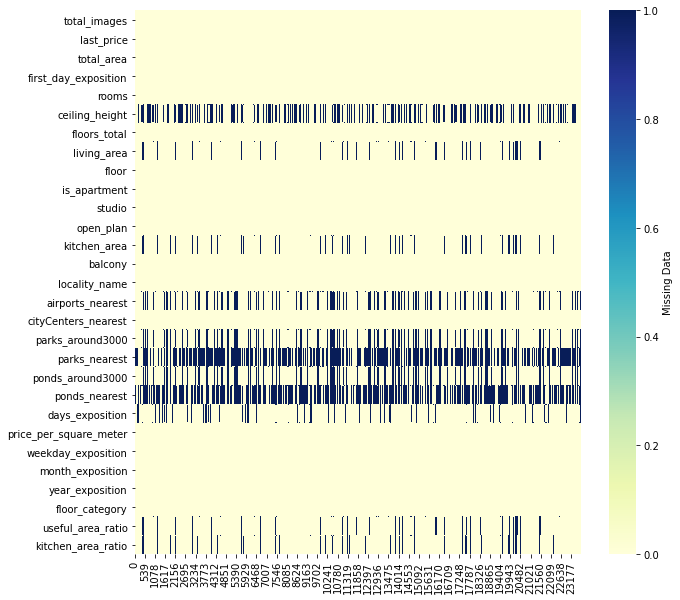

In [42]:
print(df.isna().mean()) # Методами .isna() и .mean() опредилим долю пропушенных значений

plt.figure(figsize=(10,10))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [4]:
df['balcony'] = df['balcony'].fillna(0) # Пропущенные значения в стобце ['balcony'] заменим на 0, скорее всего это недвижимость
# без балконов и при подаче объявления владельцы просто это не указали

df['is_apartment'] = df['is_apartment'].fillna(False) # столбец ['is_apartment'] имеет пропуски в 88 % значений, 
# установить точную принадлежность недвижимости к этому признаку не представляется возможным  скорее всего владельцы 
# у которых тип недвижимости - "апартаменты" точно устанавливали этот признак а остальные его пропускали, заменим
# значения на тип boll - False 


df['floors_total'] = df['floors_total'].fillna(df['floor']) # Пропущенные значения в стобце ['floors_total'] заменим на значение
# ['floor'], скорее всего владельцы последних этажей указывали только этаж квартиры а не полную этажность здания


df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(999999) # Пропущенные значения в стобце ['cityCenters_nearest'] 
# удаление от центра города, адекватных значений для заполнения не найдено, можно конечно заполнить часть значений в зависимсоти
# от населенного пункта, не будем тратить на это наше время, заполним большим удалением 99 км. чтобы они не попали в выборку
# последующего анализа данных по центральной части Санкт-Петербурга


df[df['days_exposition'].isnull()].head(10) # Столбец ['days_exposition'] показывает сколько дней объявление находилось 
# на публикации, значение проставляется при снятии с продажи, не заполненое значение говорит нам что квартира может находиться 
# еще на продаже в любом случае какой либо зависимости пропущенных значений от других столбцов не обнаружено, нужно 
# проконсультироваться c ответственными за выгрузку, оставляем без изменений
df.isna().mean()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,False,...,7.0,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,False,...,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9.0,18.00,7,False,...,6.0,0.0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2.0,94.00,2,False,...,11.0,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9.0,39.00,8,False,...,6.2,0.0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,False,...,NaN,0.0,Санкт-Петербург,NaN,999999.0,NaN,NaN,NaN,NaN,NaN
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,NaN,2.0,27.46,1,False,...,5.2,0.0,Кировск,NaN,999999.0,NaN,NaN,NaN,NaN,NaN


total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.000000
living_area             0.080299
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.000000
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.000000
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Проверим датасет на дубликаты:

In [5]:
df.duplicated().sum()


0

Приведем имена колонок к snake_case:

In [6]:
print(df.columns) 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


Данные в стобцах:
    
* df['total_images']
* df['ceiling_height']
* df['floor']
* df['is_apartment']
* df['total_area']
* df['rooms']
* df['airports_nearest']
* df['parks_around3000']
* df['parks_nearest']
* df['ponds_around3000']

пока что не вызывают нареканий:

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

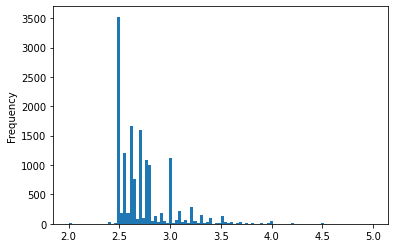

In [7]:
# Пропуски в 'locality_name' не будем трогать т.к. точно определить район не представляентся возможным
df['locality_name'].value_counts()

# При анализе 'ceiling_height' обратим внимание что есть как аномально большие значения так и аномально малые значения
df['ceiling_height'].sort_values().plot(y='ceiling_height', kind='hist', bins=100, range=(2,5))

df['ceiling_height'].describe() # Медиана и среднее по 'ceiling_height' не сильно различаются, пока что оставим как есть



Приведем данные к адекватным типам:

In [8]:
# Данные в стобце 'first_day_exposition' приведем к типу datattime формата '%Y-%m-%d' 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

# Данные о последней цене пересчитаем в тыс.
df['last_price'] = df['last_price']/1000
df['cityCenters_nearest'] = df['cityCenters_nearest']/1000

# Данные в стобцах приведем к int:
df['balcony'] = df['balcony'].astype('int')
df['rooms'] = df['rooms'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['total_area'] = df['total_area'].astype('int')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [9]:
# 8% данных по жилой площади не заполнены, можно конечно вычислить среднее отношение жилой площади к нежилой и заполнить 
# этими данными, но мы не будем тратить на это время
df['living_area'].isna().mean()


0.08029874678256467

### Вывод
Мы посчитали и обработали пропущенные значения, заполнили категоральные значения, привели данные к более удобным типам и привели названия столбцов к нормальном виду.

Пропущенные значения в стобце 'balcony' заменили на 0, скорее всего это недвижимость
без балконов и при подаче объявления владельцы просто это не указали

'is_apartment' - установить точную принадлежность недвижимости к этому признаку не представляется возможным  скорее всего владельцы у которых тип недвижимости - "апартаменты" точно устанавливали этот признак а остальные его пропускали, замениkb
значения на тип boll - False 

Пропущенные значения в стобце 'floors_total' заменили на значение 'floor', скорее всего владельцы последних этажей указывали только этаж квартиры а не полную этажность здания

Пропущенные значения в стобце 'cityCenters_nearest' удаление от центра города, адекватных значений для заполнения не найдено, можно конечно заполнить часть значений в зависимсоти от населенного пункта, не будем тратить на это наше время, заполним большим удалением 99 км. чтобы они не попали в выборку последующего анализа данных по центральной части Санкт-Петербурга

Столбец 'days_exposition' показывает сколько дней объявление находилось на публикации, значение проставляется при снятии с продажи, не заполненое значение говорит нам что квартира может находиться еще на продаже в любом случае какой либо зависимости пропущенных значений от других столбцов не обнаружено, нужно проконсультироваться c ответственными за выгрузку, оставляем без изменений.

Столбец 'ceiling_height' высота потолков, трогать не будем, нет подходяшей теории заполнения, тем более это наш целевой показатель исследования, также в связи со спецификой архитектуры Санк-Петербурга разброс высоты можеь быть большим: как 2.5 метра так и более 3 метров.

Столбцы 'kitchen_area', 'living_area' являются производными от 'total_area' можно конечно изучить СНИП и ТУ на планировку жилых помещение и примерно заполнить значения, но в задачах данного проекта не фигурируют - оставляем как есть.

Столбц 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' также не будем трогать, может это отсутсвие данных а может отсутсвие парков и водоемов вблизи, данные по заполнению можно было примерно вышислить в разрезе населенных пунктов, так как не влияют на наше исследование не будем трогать.

locality_name - название населенного пункта оставляем как есть, возможности установить название нет.


## Расчёты и добавление результатов в таблицу

In [10]:
 # Посчитаем цену квадратного метра и добавим в датасет столбец 'price_per_square_meter' 
df['price_per_square_meter'] = df['last_price'] / df['total_area']
   
df['price_per_square_meter']

0        120.370370
1         83.750000
2         92.785714
3        408.176101
4        100.000000
            ...    
23694     72.932331
23695     52.542373
23696     44.642857
23697    150.986842
23698     42.187500
Name: price_per_square_meter, Length: 23699, dtype: float64

In [11]:
 # добавим столбец дня недели
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

 # добавим  столбец месяца
df['month_exposition'] = df['first_day_exposition'].dt.month

 # добавим  столбец года
df['year_exposition'] = df['first_day_exposition'].dt.year

df[['year_exposition', 'month_exposition', 'weekday_exposition']]

,year_exposition,month_exposition,weekday_exposition
0,2019,3,3
1,2018,12,1
2,2015,8,3
3,2015,7,4
4,2018,6,1
...,...,...,...
23694,2017,3,1
23695,2018,1,0
23696,2018,2,6
23697,2017,3,1


In [12]:
 # напишем функцию для категоризации по этажам:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
 # используя метод apply применим ее к нашему датасету посторчно (параметр axis = 1)
df['floor_category'] = df.apply(floor_category, axis=1)

df['floor_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [13]:
 # добавим столбец отношения жилой площади к общей
df['useful_area_ratio'] = df['living_area'] / df['total_area']

 # добавим столбец отношения площади кухни к общей
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

df[['kitchen_area_ratio', 'useful_area_ratio']]

,kitchen_area_ratio,useful_area_ratio
0,0.231481,0.472222
1,0.275000,0.465000
2,0.148214,0.612500
3,NaN,NaN
4,0.410000,0.320000
...,...,...
23694,0.103985,0.551128
23695,0.144068,0.644068
23696,NaN,0.530357
23697,0.306579,NaN


## Исследовательский анализ данных

Определим пределы для нормальных значений используя графики boxplot для целевых показателей, чтобы в дальнейшем отфильтровать наш датасет

[12.0, 112.0]

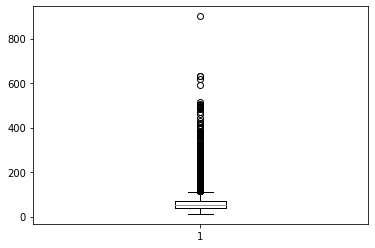

In [14]:
B = plt.boxplot(df['total_area'])
[item.get_ydata()[1] for item in B['whiskers']]

Для общей площади от 10 до 120 кв. м.

[12.19, 11900.0]

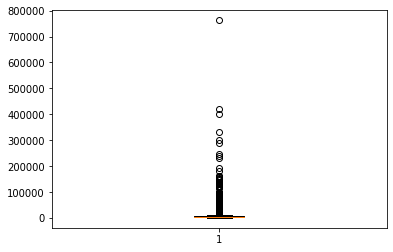

In [15]:
B = plt.boxplot(df['last_price'])
[item.get_ydata()[1] for item in B['whiskers']]

Для последней установленной цены от 10 тыс. до  12 млн.

[1.0, 512.0]

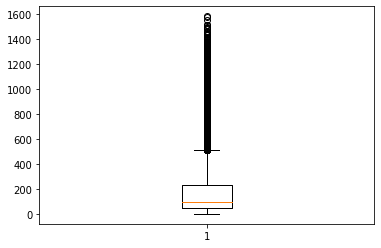

In [16]:
nan_list = [float('NaN')]
df_not_nan_days_exposition = df.query('days_exposition not in @nan_list')
t = plt.boxplot(df_not_nan_days_exposition['days_exposition'])
[item.get_ydata()[1] for item in t['whiskers']]

Для дней в течении которых были выставленны объявления от 1 до 520 дней

[2.2, 3.21]

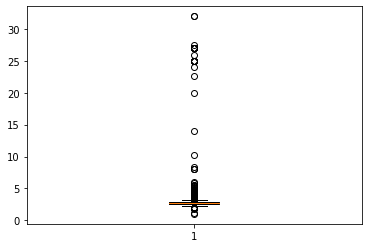

In [17]:
df_not_nan_days_ceiling_height = df.query('ceiling_height not in @nan_list & ceiling_height < 40')
t = plt.boxplot(df_not_nan_days_ceiling_height['ceiling_height'])
[item.get_ydata()[1] for item in t['whiskers']]

Для высоты потолков 2.2 - 3.3 метра

[0.0, 6.0]

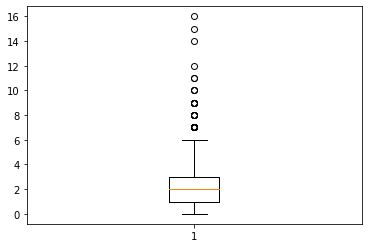

In [18]:
t = plt.boxplot(df_not_nan_days_ceiling_height['rooms'])
[item.get_ydata()[1] for item in t['whiskers']]

Для количества комнат от 0 до 6

count    22647.000000
mean        54.659867
std         20.147236
min         12.000000
25%         39.000000
50%         50.000000
75%         66.000000
max        120.000000
Name: total_area, dtype: float64


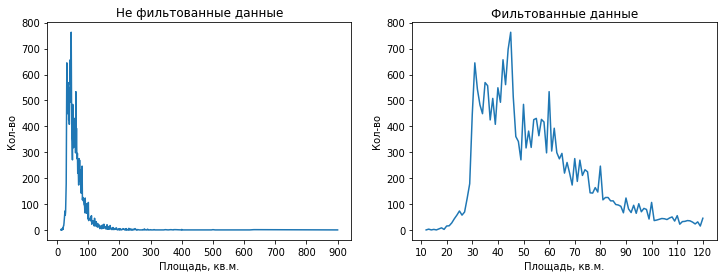

In [19]:
df_filtered_total_area = df.query('10.0 <= total_area <= 120.0')
print(df_filtered_total_area['total_area'].describe())

t = df.groupby(by=df['total_area'])['total_area'].count()
t2 = df_filtered_total_area.groupby(by=df_filtered_total_area['total_area'])['total_area'].count()

fig = plt.figure(figsize=(12,4))

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

ax_1.set(title='Не фильтованные данные', 
         xticks=np.arange(0, 1000, step=100), 
         yticks=np.arange(0, 1000, step=100),
         xlabel='Площадь, кв.м.',
         ylabel='Кол-во')
ax_2.set(title='Фильтованные данные', 
         xticks=np.arange(10, 130, step=10), 
         yticks=np.arange(0, 1000, step=100),
         xlabel='Площадь, кв.м.',
         ylabel='Кол-во')

ax_1.plot(t)
ax_2.plot(t2)

plt.show()

График площади квартир имеет логонормальное распределение, на рынке недвижимости представлены как отдельные комнаты площадью от 12 кв.м., так и элитная недвижимость площадью до 900 кв.м., наблюдается пик количества квартир с площадью 40-45 кв.м, также наблюдаем пики в районе 55, 60, 80 кв.м, пики скорее всего обусловлены стандартизацией планировок квартир.

count    21758.00000
mean      4879.30168
std       2273.42381
min         12.19000
25%       3300.00000
50%       4411.04700
75%       6000.00000
max      12000.00000
Name: last_price, dtype: float64


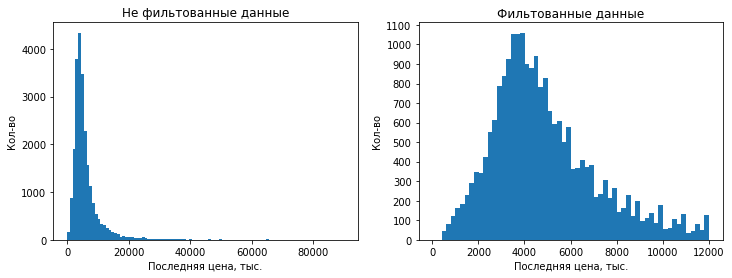

In [20]:
df_filtered_last_price = df.query('10.0 <= last_price <= 12000.0')

print(df_filtered_last_price['last_price'].describe())

fig = plt.figure(figsize=(12,4))

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

ax_1.set(title='Не фильтованные данные',
         xticks=np.arange(0, 110000, step=20000), 
         yticks=np.arange(0, 6000, step=1000),
         xlabel='Последняя цена, тыс.',
         ylabel='Кол-во')
ax_2.set(title='Фильтованные данные', 
         xticks=np.arange(0, 14000, step=2000), 
         yticks=np.arange(0, 14000, step=100),
         xlabel='Последняя цена, тыс.',
         ylabel='Кол-во')

ax_1.hist(df['last_price'], 
          bins=100, 
          range=(0,90000))
ax_2.hist(df_filtered_last_price['last_price'], 
          bins=60, 
          range=(10,12000))

plt.show()

График стоимости квартир имеет нормальное распределение, средняя стоимость квартиры на рынке 4.9 млн., цена самой дешевой  121 тыс. а самая дорогая 763 млн., медианное значение 4.41 млн. график имеет неоднородную структуру - большую скважность, эти большие отклонения от нормального распределения могут являться наложением стоимости квартир в центре и более дешевого жилья
различиями типовой планировки и в целом спецификой рынка люди ориентируются на другие ценовы предложения и это влияет на то какую цену они просят за свою квартиру.

count    23609.000000
mean         2.047905
std          1.006772
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


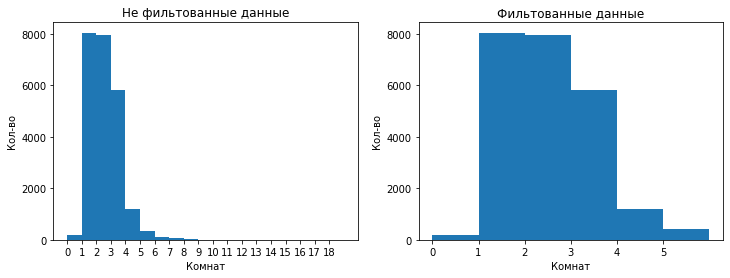

In [21]:
df_filtered_rooms = df.query('0 <= rooms <= 6')

print(df_filtered_rooms['rooms'].describe())

fig = plt.figure(figsize=(12,4))

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

ax_1.set(title='Не фильтованные данные',
         xticks=np.arange(0, 19, step=1), 
         yticks=np.arange(0, 10000, step=2000),
         xlabel='Комнат',
         ylabel='Кол-во')
ax_2.set(title='Фильтованные данные', 
         xticks=np.arange(0, 6, step=1), 
         yticks=np.arange(0, 10000, step=2000),
         xlabel='Комнат',
         ylabel='Кол-во')

ax_1.hist(df['rooms'], 
          bins=19, 
          range=(0,19))
ax_2.hist(df_filtered_rooms['rooms'], 
          bins=6, 
          range=(0,6))

plt.show()

Большинство представленных квартир имеет 1 или 2 комнаты по 8 тыс. объявлений соответсвенно, причем предложение однокомнатных квартир с небольшим отрывом (всего 100 квартир) больше двухкомнатных, не далеко ушли и трех комнатные квартиры их чуть менее 6 тыс., четырехкомнатные квартиры представленны в кол-ве чуть более 1 тыс. объявлений, есть данные о 0 комнат - скорее всего это могут быть доли в квартирах. Максимальное количество комнат 19.  

count    13883.000000
mean         2.689036
std          0.196902
min          2.200000
25%          2.500000
50%          2.650000
75%          2.785000
max          3.300000
Name: ceiling_height, dtype: float64


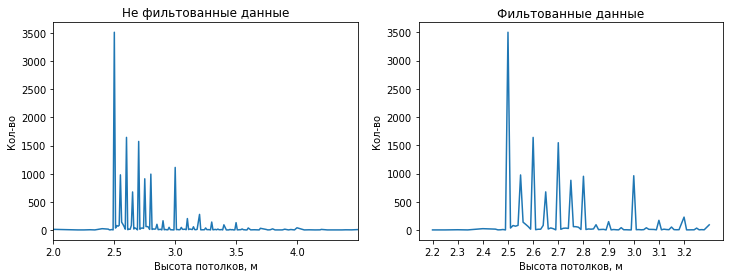

In [22]:
df_filtered_ceiling_height = df.query('2.2 <= ceiling_height <= 3.3')
print(df_filtered_ceiling_height['ceiling_height'].describe())

t = df.groupby(by=df['ceiling_height'])['ceiling_height'].count()
t2 = df_filtered_ceiling_height.groupby(by=df_filtered_total_area['ceiling_height'])['ceiling_height'].count()

fig = plt.figure(figsize=(12,4))

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

ax_1.set(title='Не фильтованные данные',
         xticks=np.arange(2, 4.5, step=0.5), 
         yticks=np.arange(0, 4000, step=500),
         xlabel='Высота потолков, м',
         ylabel='Кол-во',
         xlim=(2, 4.5))
ax_2.set(title='Фильтованные данные', 
         xticks=np.arange(2.2, 3.3, step=0.1), 
         yticks=np.arange(0, 4000, step=500),
         xlabel='Высота потолков, м',
         ylabel='Кол-во')

ax_1.plot(t)
ax_2.plot(t2)

plt.show()

Большинство квартир имеет потолки высотой 2.5 - 2.6 метра, также на рынке представленны квартиры с высотой потолка 3 метра, это обусловлено спецификой архитектуры Санкт-Петербурга.

count    18894.000000
mean       129.678364
std        122.852225
min          1.000000
25%         41.000000
50%         85.000000
75%        184.000000
max        520.000000
Name: days_exposition, dtype: float64

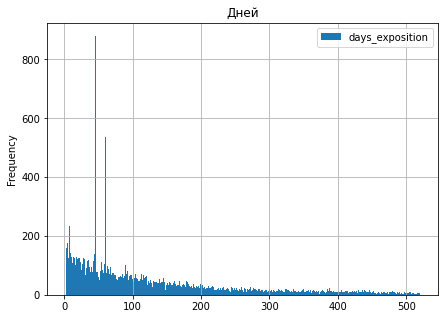

In [23]:
df_not_nan_days_exposition = df_not_nan_days_exposition.query('1.0 <= days_exposition <= 520.0')
df_not_nan_days_exposition.plot(y='days_exposition', kind='hist', bins=520, grid=True, figsize=(7,5), title='Дней')
df_not_nan_days_exposition['days_exposition'].describe()

    Предположим что датой продажи может являться дата снятия объявлений в n-х количествах случаев, при ознакомлении с данными на гистограмме заметны выбросы: 7, 30, 45, 60, 90 дней, почитав правила размешения обьявлений "Яндекс Недвижимости" приходим к выводу что пики на 7, 30, 45, 60, 90 дней скорее всего являются датами автоматического снятия объявлений. 
    Вообще в таком случае мы должны проконсультироваться с коллегами ответсвенными за выгрузку данных. В любом случае будем работать с теми данными которые имеем: очистим данные от выбросов.

Квартир c автоматическим снятием объявлений : 980


count    17914.000000
mean       134.530814
std        124.245869
min          1.000000
25%         43.000000
50%         91.000000
75%        192.000000
max        520.000000
Name: days_exposition, dtype: float64

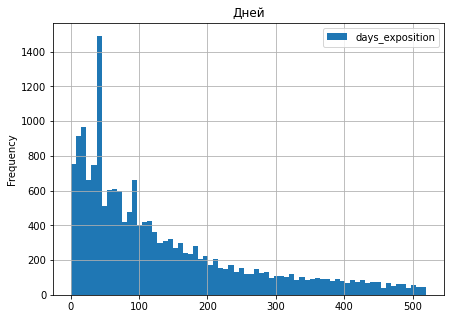

In [24]:
days_rule_exposition = [7.0, 30.0, 45.0, 60.0, 90.0]

df_filtered_days_exposition = df_not_nan_days_exposition.query('days_exposition not in @days_rule_exposition') # Фильтруем данные
print('Квартир c автоматическим снятием объявлений :', len(df_not_nan_days_exposition.query('days_exposition in @days_rule_exposition')))

df_filtered_days_exposition.plot(y='days_exposition', kind='hist', bins=70, grid=True, figsize=(7,5), title='Дней')
df_filtered_days_exposition['days_exposition'].describe() # Медиана, среднее, квантили

После очистки данных картина стала более понятной медианное значение увеличилось с 85 до 91 дней, также возросло среднее с 129 дней до 134, судя по диаграмме размаха нормальные значения распологаются от 1 до 520 дней. По текущим данным , половина квартир продается в первые 3.5 месяца, в среднем продажа квартиры занимает 6.5 месяцев.

0.7026353438779385

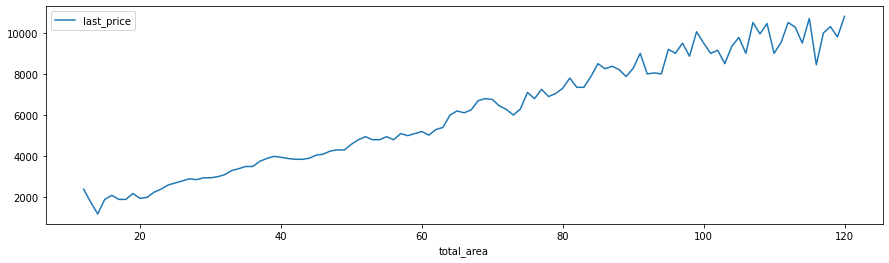

In [25]:
df_filtered_total_area_and_last_price = df_filtered_last_price.query('10.0 <= total_area <= 120.0')
pivot_table_total_area = df_filtered_total_area_and_last_price.pivot_table(index='total_area', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_total_area.plot(y='median', style='-', figsize=(15,4))

df_filtered_total_area_and_last_price['total_area'].corr(df_filtered_total_area_and_last_price['last_price'])

На графике видна стабильная корреляция - с увеличением площади квартиры растет цена за квартиру

,mean,count,median
rooms,,,
0,2924.264872,195,2700.0
1,3761.424631,8010,3600.0
2,5036.764131,7629,4690.0
3,6059.171460,5001,5750.0
4,7036.154620,776,7000.0
5,8488.658730,126,9000.0
6,9878.210526,19,10500.0


0.36724855921457317

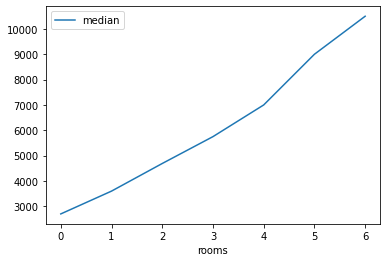

In [26]:
df_filtered_rooms_and_last_price = df_filtered_rooms.query('10.0 <= last_price <= 12000.0')

pivot_table_rooms = df_filtered_rooms_and_last_price.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
display(pivot_table_rooms)
pivot_table_rooms.plot(y = 'median')
df_filtered_rooms['rooms'].corr(df_filtered_rooms['last_price'])

Что и следовало ожидать чем меньше комнат тем дешевле квартира

-0.3485891167607475

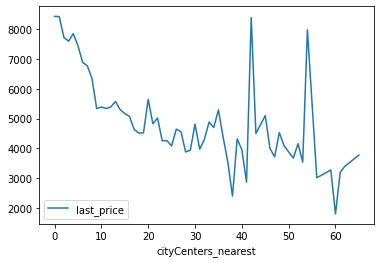

In [27]:
df_filtered_last_price_and_cityCenters_nearest = df_filtered_last_price.query(('cityCenters_nearest not in @nan_list')and('cityCenters_nearest < 100'))

pivot_table_nearest = df_filtered_last_price_and_cityCenters_nearest.pivot_table(index='cityCenters_nearest', values='last_price')
pivot_table_nearest.plot(y='last_price')
df_filtered_last_price_and_cityCenters_nearest['cityCenters_nearest'].corr(df_filtered_last_price_and_cityCenters_nearest['last_price'])


С удалением от центра города снижаются цены на недвижимсоть

,mean,count,median
floor_category,,,
другой,5070.768582,15854,4600.0
первый,4160.473764,2818,3820.0
последний,4552.062798,3086,4100.0


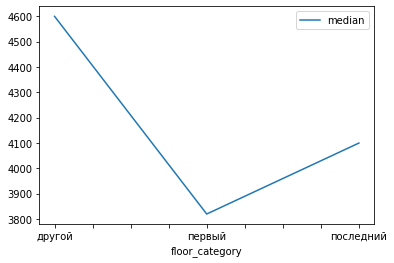

In [28]:
pivot_table_floor_category = df_filtered_last_price.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_floor_category.columns=['mean', 'count', 'median']
pivot_table_floor_category.plot(y='median')
pivot_table_floor_category

Квартиры на первом этаже дешевле чем на последнем на 7% и на 17% дешевле чем остальные


,mean,count,median
weekday_exposition,,,
0,4875.461839,3312,4450.0
1,4935.123161,3850,4500.0
2,4917.293718,3635,4500.0
3,4889.786958,3893,4400.0
4,4859.565026,3699,4390.0
5,4757.604213,1790,4400.0
6,4822.131928,1579,4400.0


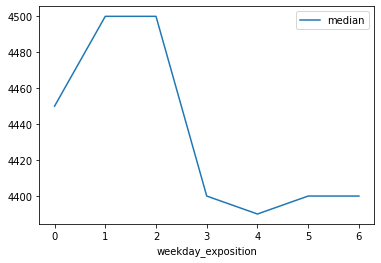

In [29]:
pivot_table_weekday_exposition = df_filtered_last_price.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y='median')

pivot_table_weekday_exposition

На графике зависимости стоимости квартиры. от дня подачи объявления заметен пик цены за квадратный метр во вторник и уменьшение цены к выходным, я считаю что это связанно с деловой активностью в разрезе недели, самая низкая цена наблюдается в пятницу.

,mean,count,median
month_exposition,,,
1,4838.378641,1364,4400.00
2,4874.888785,2427,4400.00
3,4842.743083,2380,4450.00
4,4976.266831,2189,4590.00
5,4857.883171,1167,4350.00
6,4725.796781,1629,4200.00
7,4883.113744,1550,4399.50
8,4877.171624,1605,4400.00
9,4998.952723,1815,4490.00


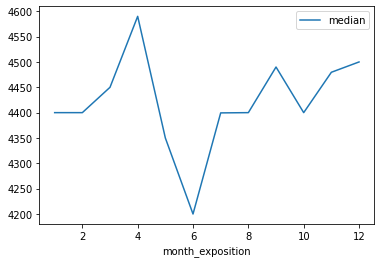

In [30]:
pivot_table_month_exposition = df_filtered_last_price.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_month_exposition.columns=['mean', 'count', 'median']
pivot_table_month_exposition.plot(y='median')
pivot_table_month_exposition

На графике зависимости стоимости кв. м. от месяца заметен пик цены за квадратный метр в апреле, в летний период наблюдается спад, скорее всего из-за отпусков, также есть спад после сентября связанный с окончанием отпусков и началом учебноого года и небольшой рост перед новогодними праздниками, рынку недвижимости присуща сезонность.

<AxesSubplot:xlabel='year_exposition'>

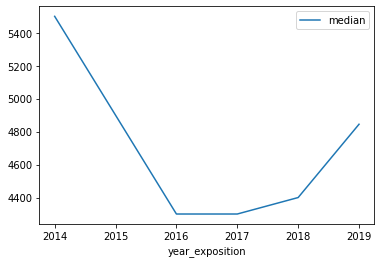

In [31]:
pivot_table_year_exposition = df_filtered_last_price.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y='median')

С 2014 года цена недвижимости падала вплоть до 2016 г. затем в 2018-2019 г. начала отигрывать позиции, я считаю что это связанно с падением курса рубля в 2014 году ...

In [32]:
locality_pivot_table = df.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table.sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15721,115.347723
посёлок Мурино,522,86.379969
посёлок Шушары,440,79.068603
Всеволожск,398,68.985235
Пушкин,369,103.611363
Колпино,338,75.735590
посёлок Парголово,327,90.675628
Гатчина,307,69.045519
деревня Кудрово,299,93.002173


In [33]:
locality_pivot_table = df.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'median'])
locality_pivot_table.columns = ['count', 'median']
locality_pivot_table = locality_pivot_table.query('count>50')
#самая высокая стоимость
display(locality_pivot_table[locality_pivot_table['median']==locality_pivot_table['median'].max()])
#самая низкая стоимость
display(locality_pivot_table[locality_pivot_table['median']==locality_pivot_table['median'].min()])

,count,median
locality_name,,
Санкт-Петербург,15721,5500.0


,count,median
locality_name,,
Сланцы,112,810.0


Топ 10 населенных пунктов и городов по количеству объявлений, возглавляет Санкт-Петербург, самая высокая стоимость жилья также в Санкт-Петербурге, а самая низкая в г. Сланцы

<AxesSubplot:xlabel='cityCenters_nearest'>

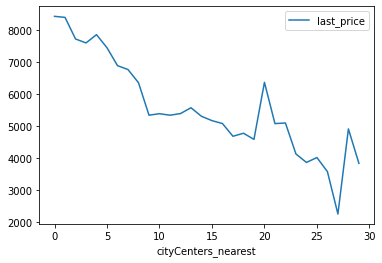

In [34]:
pivot_table_km = df_filtered_last_price.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 200').pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean')
pivot_table_km.plot()

Судя по графику центр будем считать в радиусе 0-10 километров

0.5216071569086681

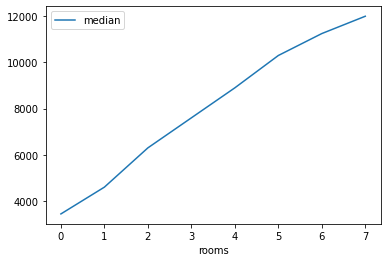

In [35]:
center_spb_data = df_filtered_last_price.query('0 <= cityCenters_nearest <= 10 and locality_name == "Санкт-Петербург"')

center_spb_rooms = center_spb_data.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.plot(y='median')

center_spb_data['rooms'].corr(center_spb_data['last_price'])

Чем больше комнат в квартире тем она дороже, коэфициет корреляции 0.52

,mean,count,median
floor_category,,,
другой,6793.062725,3253,6500.0
первый,5844.568508,587,5420.0
последний,6784.039666,688,6500.0


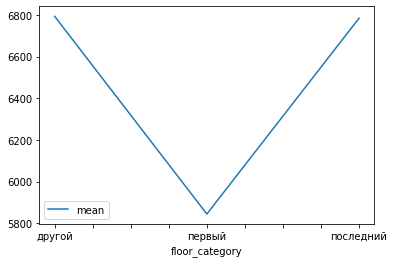

In [36]:
center_spb_floor_category = center_spb_data.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y='mean')
center_spb_floor_category

Квартиры на первых этажах дешевле на 17 процентов чем на последних и на остальных этажах

-0.41208348224870445

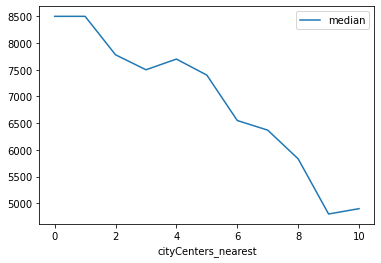

In [37]:
center_spb_floor_category = center_spb_data.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y='median')
center_spb_floor_category
center_spb_data['cityCenters_nearest'].corr(center_spb_data['last_price'])

Зависимость цены квартиры от  расстояния до центра есть, чем дальше от центра тем дешевли квартиры, причем разница достигает 40 % на удалении от центра 10 км.

,mean,count,median_center
weekday_exposition,,,
5,6544.702938,354,6425.0
4,6653.138533,778,6400.0
3,6715.928053,855,6394.8
0,6666.418129,660,6375.0
1,6642.504519,826,6350.0
6,6693.888313,294,6350.0
2,6710.093406,761,6300.0


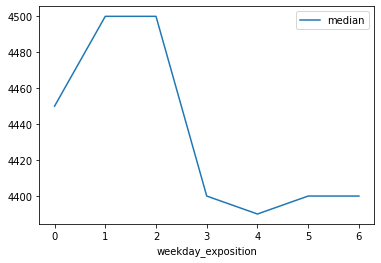

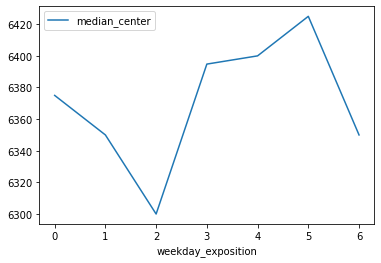

In [38]:
center_spb_weekday_exposition = center_spb_data.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median_center']
pivot_table_weekday_exposition.plot(y='median')
center_spb_weekday_exposition.plot(y='median_center')

center_spb_weekday_exposition.sort_values('median_center', ascending = False)

Ситуация с стоимостью квартиры по отношению к дням недели координально различная, пик активности сместился к субботе
в среду цены минимальные.

,mean,count,median_center
month_exposition,,,
9,7160.627629,388,6885.0
1,6793.752112,269,6550.0
8,6805.494942,329,6500.0
7,6674.539830,348,6495.0
12,6605.924198,308,6450.0
4,6660.959667,453,6350.0
2,6634.831357,496,6300.0
11,6709.106413,407,6300.0
3,6613.410029,490,6244.8


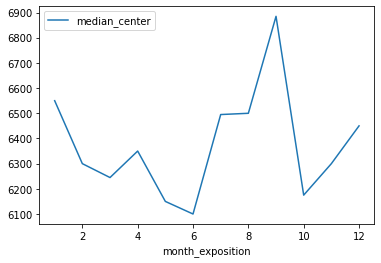

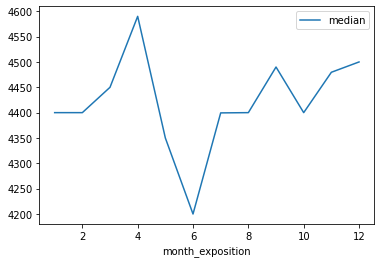

In [39]:
center_spb_month_exposition = center_spb_data.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median_center']
center_spb_month_exposition.plot(y='median_center')
pivot_table_month_exposition.plot(y='median')
center_spb_month_exposition.sort_values('median_center', ascending=False)

Также как и в остальной части выборки мы наблюдаем выраженную сезонность, но пик стоимости квартир сместился на осенний период, минимальные цены наблюдаем в июле, есть спад в ноябре.

,mean,count,median_center
year_exposition,,,
2015,7053.380234,312,6756.696
2014,7335.224345,29,6750.000
2019,6720.950851,518,6475.000
2016,6673.555983,589,6440.000
2018,6608.869618,1522,6300.000
2017,6618.588790,1558,6291.000


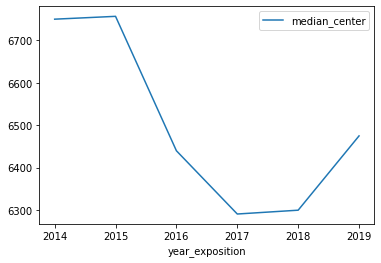

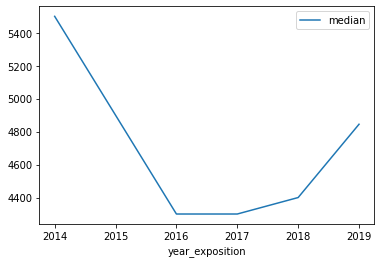

In [40]:
center_spb_year_exposition = center_spb_data.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median_center']
center_spb_year_exposition.plot(y='median_center')
pivot_table_year_exposition.plot(y='median')
center_spb_year_exposition.sort_values('median_center', ascending=False)

Ситуация в разрезе годов не отличается от общей выборки, кризис 2014 года точно также повлиял на жилье в центре города как и на остальную часть выборки.

## Общий вывод

  Мы ознакомились с предоставленным датасетом, предобработали данные, заполнили пропущенные значения, заменили типы данных на более удобные.
  
  Выявили аномальные значения, выбросы и обработали их. Посчитали и добавили в датасет дополнительные данные. Определили диапазоны нормальных значений при помощи графиков boxplot, при анализе показателей использовали отфильтрованные значения.  Изучили следующие параметры: площадь, цена, число комнат, высота потолков и построили для них гистограммы зависимости от них цены кв.м. недвижимости.
  
  Выяснили что квартиры на первых этажах могут стоить до 17% дешевле остальных. Увидели что на рынке присутсвуют квартиры с высокими потолками что специфично для Санкт-Петербурга.
  
  Изучили время продажи квартиры и выяснили что часть объявлений была снята с публикации автоматически по истечении времени. Установили что этаж, удаленность от центра, количество комнат и площадь влияют на стоимость кв. м. жилья.
  
  Выявили что рынок недвижимости подвержен сезонности и также что от дня подачи объявленя зависит стоимость кв.м. недвижимости. В целом по рынку с 2014 г. наблюдался спад стоимости жилья и лишь в 2016 г. цены начали тенденцию к росту.
  
  Рынок недвижимости центральной части (до 10 км.) Санкт-Петербурга как оказалось имеет свою спицифику, при приближении к центру возрастает доля элитной недвижимости, вообще для более глубокого анализа требуется категоризировать объекты  недвижимости по ценовым категория, в нашем случае мы делали общий обзор.
  
  Рассматривая рынок в разрезе центральной части города, мы выявили некоторые отличия от рынка в целом: недвижимости в центре северной столице дороже, также мы обратили внимание на на рост стоимости жилья осенью что отличается от динамики по рынку в целом, ситуация с стоимостью квартир по отношению к дням недели координально различная, пик активности сместился к субботе в среду цены минимальные.   

  Выяснили что топ 10 населенных пунктов и городов по количеству объявлений, возглавляет Санкт-Петербург, самая высокая стоимость жилья также в Санкт-Петербурге, а самая низкая в г. Сланцы